# Nicht generatives Trainig mit DeepHull simple loss

In [67]:
import torch

from script.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [68]:
sequential = False
epochs = 1
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]
if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [69]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

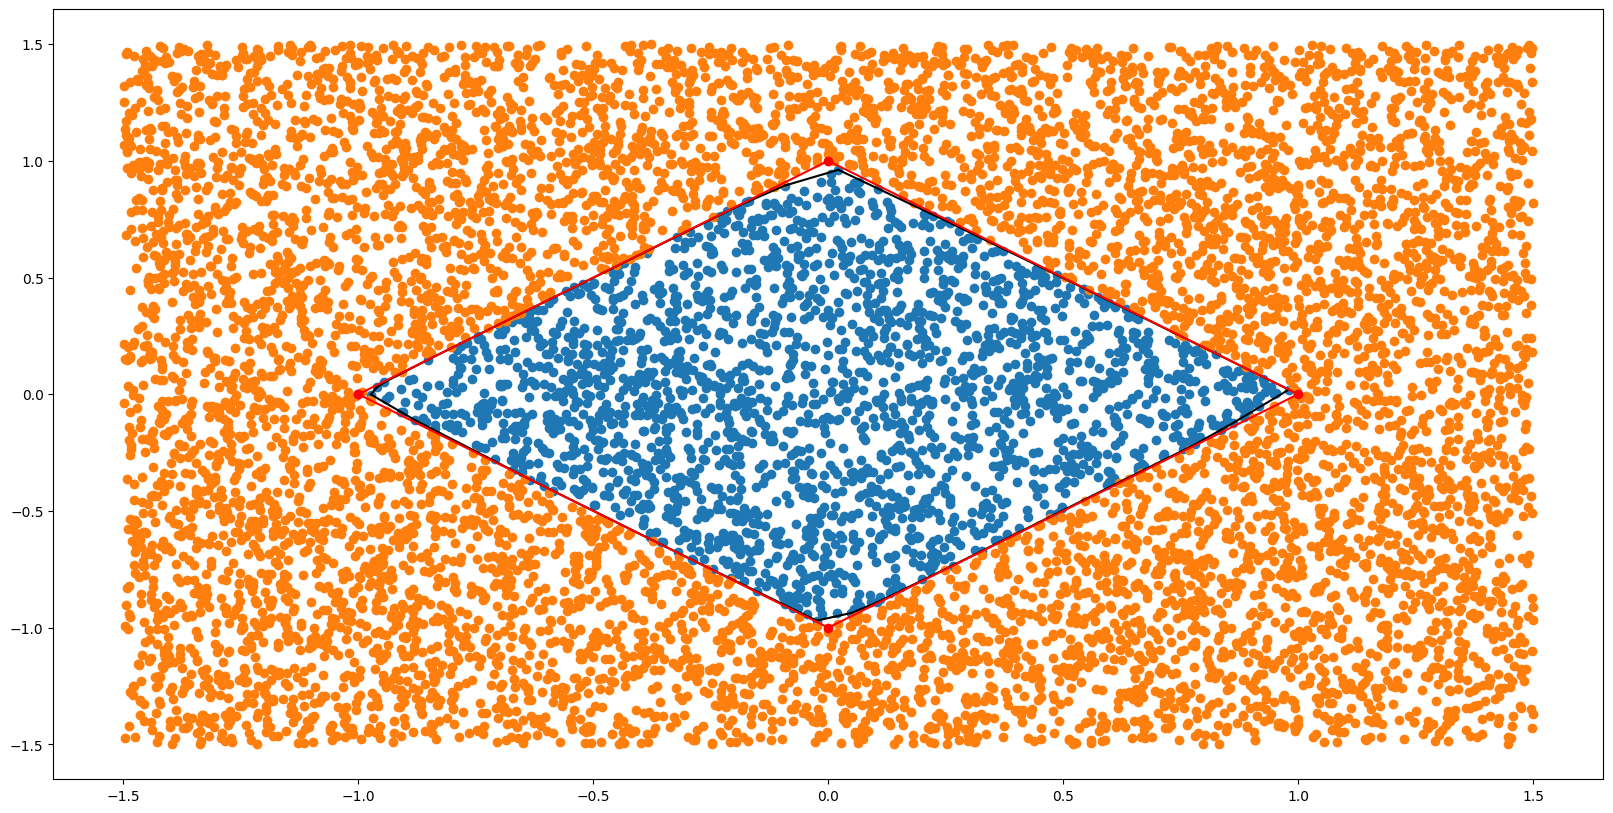

In [70]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range)
plots.plt_initial()


In [71]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 1.38673996925354
batch = 100, mean loss = 1.441966975089347
batch = 200, mean loss = 1.3959181887000354
batch = 300, mean loss = 1.354834156773019
batch = 400, mean loss = 1.3279854093406562
batch = 500, mean loss = 1.3112440774302758
batch = 600, mean loss = 1.287790588253548
batch = 700, mean loss = 1.2653588423035114
batch = 800, mean loss = 1.2368857974416754
batch = 900, mean loss = 1.2169650802998644
batch = 1000, mean loss = 1.1948882435466146
batch = 1100, mean loss = 1.1711847999765048
batch = 1200, mean loss = 1.1485437287527953
batch = 1300, mean loss = 1.1302660898370618
batch = 1400, mean loss = 1.111342399270087
batch = 1500, mean loss = 1.0929743303885704
batch = 1600, mean loss = 1.0733484415841208
batch = 1700, mean loss = 1.0537113158370661
batch = 1800, mean loss = 1.0365821019865817
batch = 1900, mean loss = 1.0152155743781546
batch = 2000, mean loss = 0.9989113387452072
batch = 2100, mean loss = 0.9820365344113478
batch = 2200

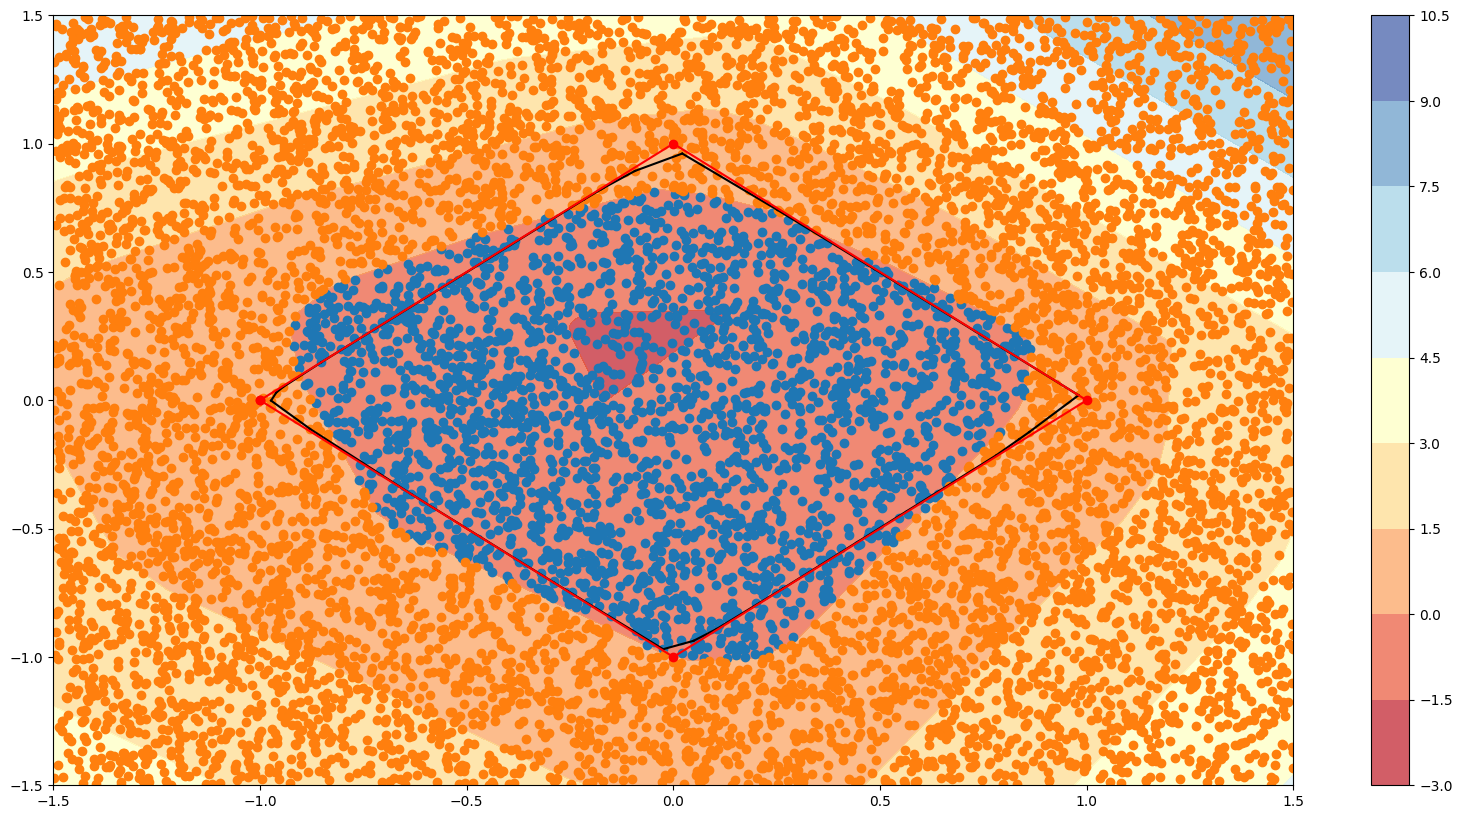

In [72]:
plots.plt_mesh()

In [73]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A=A, b=b, sequential=sequential)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 391 nonzeros
Model fingerprint: 0xab49d2c8
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [2e-05, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+03]
  RHS range        [2e-02, 1e+03]
Found heuristic solution: objective -1.4875342
Presolve removed 69 rows and 46 columns
Presolve time: 0.00s
Presolved: 69 rows, 50 columns, 274 nonzeros
Variable types: 33 continuous, 17 integer (17 binary)

Root relaxation: objective 7.390949e+00, 39 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    7.39095    0 

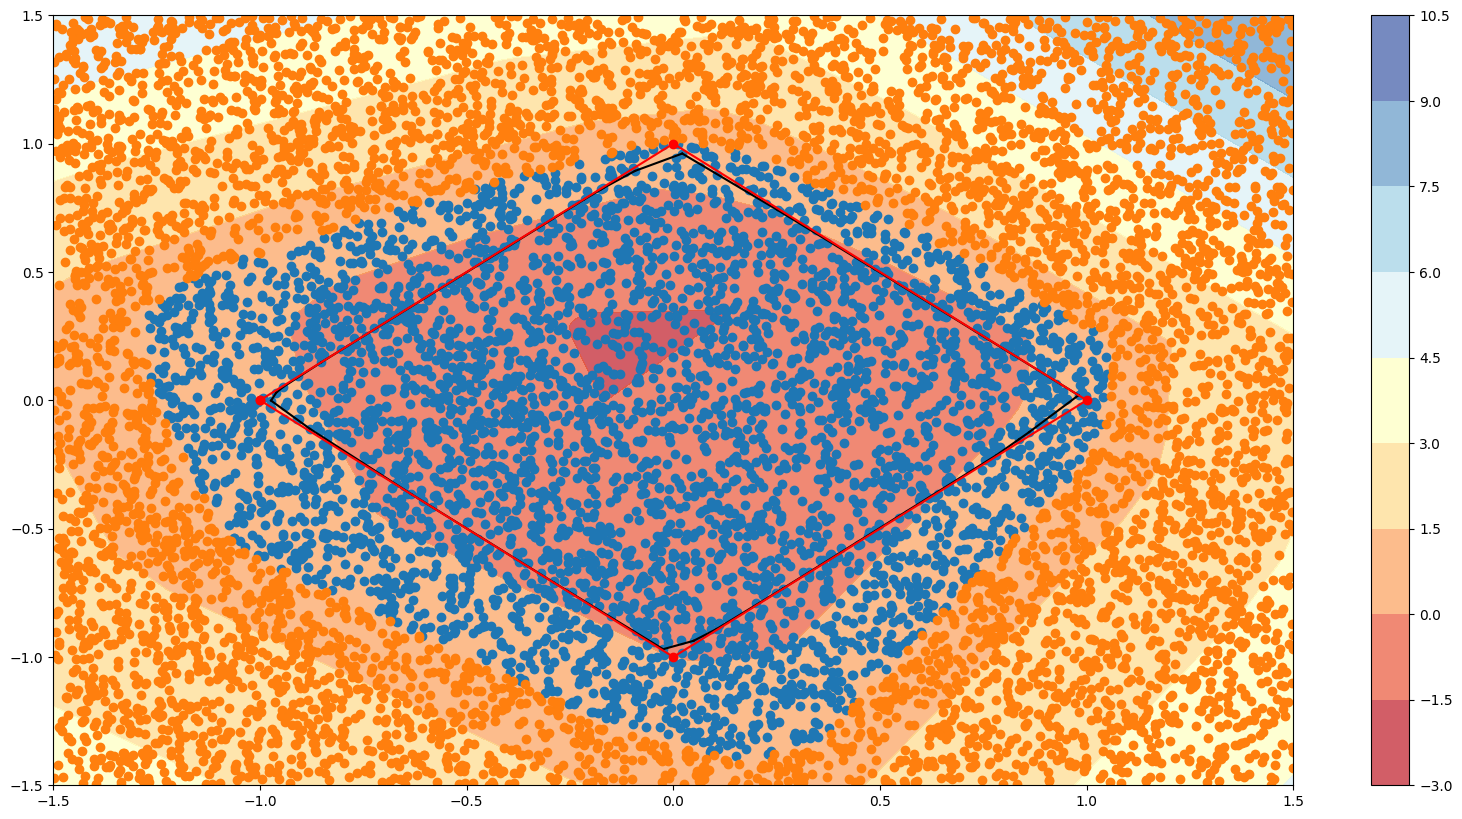

In [74]:
input_data, plots.c = result
plots.plt_mesh()